In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_control=pd.read_csv("/kaggle/input/ab-testing-dataset/control_group.csv",sep=';')
df_test=pd.read_csv("/kaggle/input/ab-testing-dataset/test_group.csv",sep=';')


In [5]:
df_control['Date'] = pd.to_datetime(df_control['Date'], format='%d.%m.%Y')
print(df_control.info())
df_control.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     29 non-null     float64       
 4   Reach                29 non-null     float64       
 5   # of Website Clicks  29 non-null     float64       
 6   # of Searches        29 non-null     float64       
 7   # of View Content    29 non-null     float64       
 8   # of Add to Cart     29 non-null     float64       
 9   # of Purchase        29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB
None


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d.%m.%Y')
print(df_test.info())
df_test.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     int64         
 4   Reach                30 non-null     int64         
 5   # of Website Clicks  30 non-null     int64         
 6   # of Searches        30 non-null     int64         
 7   # of View Content    30 non-null     int64         
 8   # of Add to Cart     30 non-null     int64         
 9   # of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB
None


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [7]:
cols_to_fill=['# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase']
numeric_cols = df_test.select_dtypes(include=['int', 'float']).columns
df_test[numeric_cols] = df_test[numeric_cols].astype(float)

In [8]:
## control-data have nan value, lets replace by columns mean
df_control[cols_to_fill] = df_control[cols_to_fill].fillna(df_control[cols_to_fill].mean()).round(1)
df_control.info()
## nan values replaced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     float64       
 4   Reach                30 non-null     float64       
 5   # of Website Clicks  30 non-null     float64       
 6   # of Searches        30 non-null     float64       
 7   # of View Content    30 non-null     float64       
 8   # of Add to Cart     30 non-null     float64       
 9   # of Purchase        30 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [9]:
##lets concat dataset
df = pd.concat([df_control, df_test], ignore_index=True).sort_values(by='Date').reset_index(drop=True)
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280.0,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-08-01,3008.0,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Control Campaign,2019-08-02,1757.0,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,Test Campaign,2019-08-02,2542.0,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,Control Campaign,2019-08-03,2343.0,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


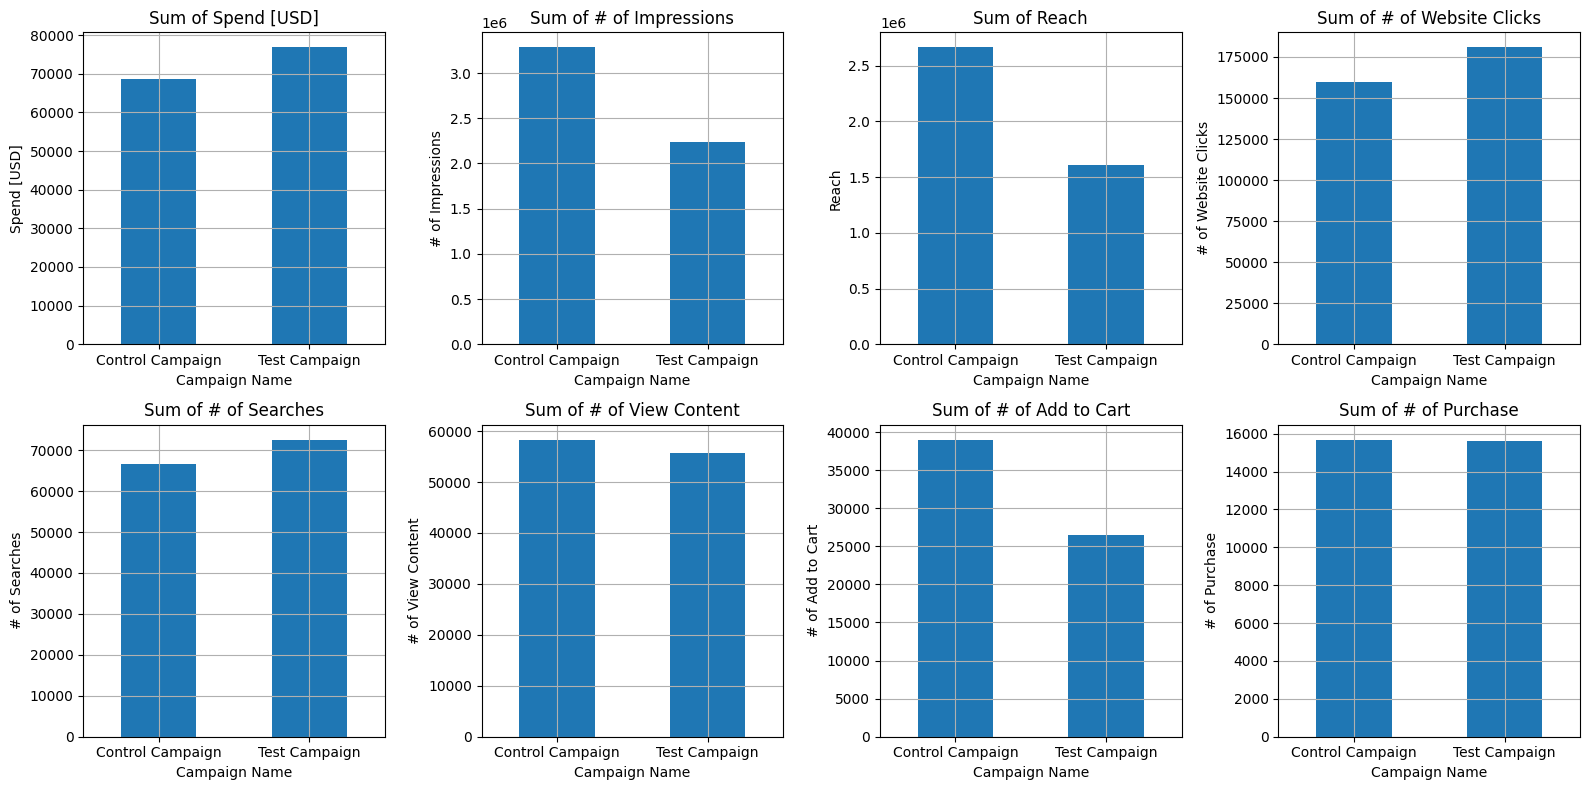

In [10]:
def plot_campaign_sums(ax,df, campaign_column, kpi_column,agg):
    """
    Plot a bar chart to visualize the sum of KPI values for each campaign.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - campaign_column (str): The name of the column containing campaign names.
    - kpi_column (str): The name of the column containing the KPI values.
    -agg(str): sum or mean

    Returns:
    - None
    """
    # Aggregate data by campaign name and calculate the sum of KPI values
    if agg=='Sum':
        campaign_value = df.groupby(campaign_column)[kpi_column].sum()
    elif agg=='Mean':
        campaign_value= df.groupby(campaign_column)[kpi_column].mean()
    #plt.subplot(*location)

    # Plot the bar chart
    campaign_value.plot(kind='bar', ax=ax)    
    # Add labels and title
    ax.set_title(f'{agg} of {kpi_column}')
    ax.set_xlabel(f'{campaign_column}')
    ax.set_ylabel(f'{kpi_column}')
    ax.grid(True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    # Show plot
    plt.tight_layout()
    #plt.show()

# Example usage:
# Assuming df is your DataFrame with columns 'campaign_name' and 'kpi_value'
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

for idx, column in enumerate(numeric_cols):
    row = idx // num_cols
    col = idx % num_cols
    plot_campaign_sums(axes[row, col], df, 'Campaign Name', column, 'Sum')
# money spent in test campaign is more than control
# but the impressions and reach are more in control
#searches and website clicks are more in test
# view content and number of (add to cart) is more in control
# for purchase control and test r same

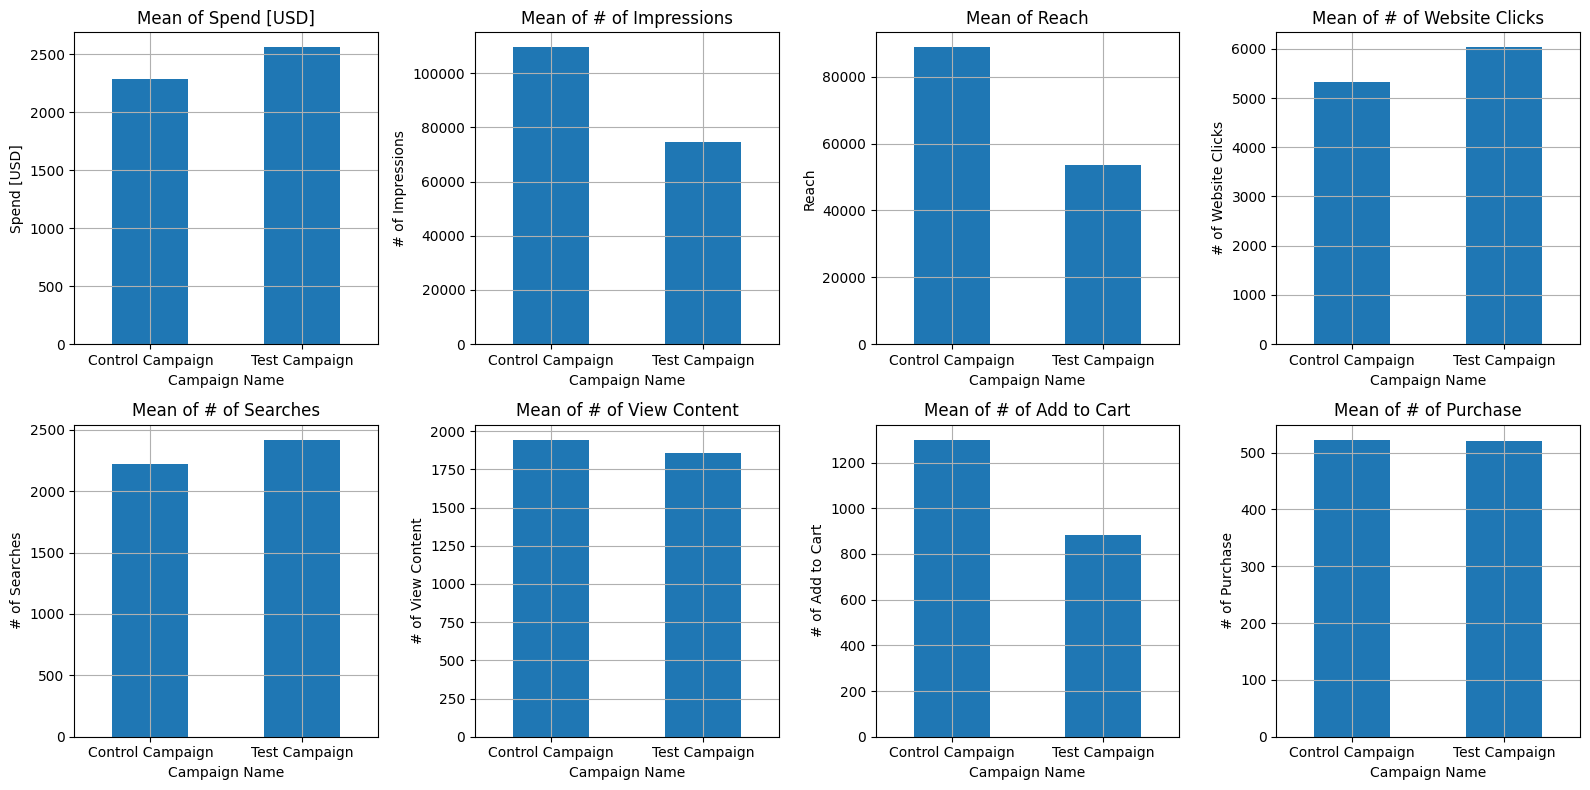

In [11]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
for idx, column in enumerate(numeric_cols):
    row = idx // num_cols
    col = idx % num_cols
    plot_campaign_sums(axes[row, col], df, 'Campaign Name', column, 'Mean')

In [12]:
#hypothesis formulation
# first lets consider number of purchases as metric to see if campaign is successful or not
# Null Hypothesis= There is no significant difference between control and test group
# alternative hypo = here is significant difference between control and test group
# assume significant level= 0.05 (alpha)


In [13]:
# we can select t test here since we dont have samples higher than 30 and standard deviation of population is unknown
# in test, we can choose independed samples t test since the units in test, control group are independent of each other

In [14]:
# degree of freedom =30( size of each group)
# before we go to t-test, lets make sure assumptions of t-test are met

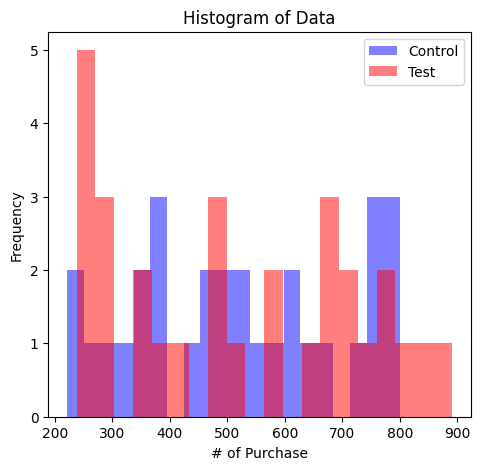

In [15]:
# each group has a normal distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['Campaign Name']=='Control Campaign']['# of Purchase'], bins=20, color='blue', alpha=0.5, label='Control')
plt.hist(df[df['Campaign Name']=='Test Campaign']['# of Purchase'], bins=20, color='red', alpha=0.5, label='Test')
plt.title('Histogram of Data')
plt.xlabel('# of Purchase')
plt.ylabel('Frequency')
plt.legend()

In [20]:
def normality_test(df,kpi):
    _, p_value_group1 = stats.shapiro(df[df['Campaign Name']=='Control Campaign'][kpi])
    _, p_value_group2 = stats.shapiro(df[df['Campaign Name']=='Test Campaign'][kpi])

    print("Shapiro-Wilk test results:")
    print(f"Control:")
    print(f"  Test Statistic: {_:.4f}")
    print(f"  p-value: {p_value_group1:.4f}")
    if p_value_group1 < 0.05:
        print("  The null hypothesis of normality is rejected, suggesting that the data is not normally distributed.")
    else:
        print("  The null hypothesis of normality is not rejected, suggesting that the data is approximately normally distributed.")

    print(f"\nTest:")
    print(f"  Test Statistic: {_:.4f}")
    print(f"  p-value: {p_value_group2:.4f}")
    if p_value_group2 < 0.05:
        print("  The null hypothesis of normality is rejected, suggesting that the data is not normally distributed.")
    else:
        print("  The null hypothesis of normality is not rejected, suggesting that the data is approximately normally distributed.")
    
normality_test(df,'# of Purchase')


Shapiro-Wilk test results:
Control:
  Test Statistic: 0.9182
  p-value: 0.1114
  The null hypothesis of normality is not rejected, suggesting that the data is approximately normally distributed.

Test:
  Test Statistic: 0.9182
  p-value: 0.0241
  The null hypothesis of normality is rejected, suggesting that the data is not normally distributed.


In [21]:
# checking for homogenity of varaince assumption
from scipy.stats import levene
def variance_equal_check(df,kpi):
    statistic, p_value = levene(df[df['Campaign Name']=='Control Campaign'][kpi], 
                                df[df['Campaign Name']=='Test Campaign'][kpi])

    print("Levene's test for Homogeneity of Variances:")
    print(f"Test Statistic: {statistic:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret the results
    if p_value > 0.05:
        print("The null hypothesis of homogeneity of variances is not rejected.")
    else:
        print("The null hypothesis of homogeneity of variances is rejected, indicating unequal variances between groups.")
variance_equal_check(df,'# of Purchase')

Levene's test for Homogeneity of Variances:
Test Statistic: 1.67
P-value: 0.2017
The null hypothesis of homogeneity of variances is not rejected.


In [105]:
## NOW WE HAVE CREATE TWO TEST, BOOSTRAPPING AND MANNWHITNEY TEST TO PERFORM A/B TEST WHEN DISTRIBUTION IS NORMAL
def compute_difference(control_sample, test_sample):
    return np.mean(test_sample) - np.mean(control_sample)
def bootstrap(df,kpi, num_samples=1000):
    differences = []
    np.random.seed(24)
    for _ in range(num_samples):
        control_group=df[df['Campaign Name']=='Control Campaign'][kpi]
        test_group=df[df['Campaign Name']=='Test Campaign'][kpi]
        control_sample = np.random.choice(control_group, size=len(control_group), replace=True)
        test_sample = np.random.choice(test_group, size=len(test_group), replace=True)
        difference = compute_difference(control_sample, test_sample)
        differences.append(difference)
    return differences
from scipy.stats import mannwhitneyu
def mannwhitney_test(df,kpi):
    statistic, p_value = mannwhitneyu(df[df['Campaign Name']=='Control Campaign'][kpi], df[df['Campaign Name']=='Test Campaign'][kpi])

    # Interpret the results
    if p_value < 0.05:
        print("Mann:There is a significant difference between the test and control groups.")
    else:
        print("Mann:There is no significant difference between the test and control groups.")
def boostrap_sampling_test(df,kpi):
    differences =bootstrap(df,kpi)
    confidence_interval = np.percentile(differences, [2.5, 97.5])
    import matplotlib.pyplot as plt
    plt.hist(differences, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(x=np.mean(differences), color='red', linestyle='--', label='Mean Difference')
    plt.xlabel('Difference in Means (Test Group - Control Group)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Differences in Means for {kpi}')
    plt.legend()
    plt.show()
    if confidence_interval[0] > 0:
        print("Boostrap:The test group is performing significantly better than the control group.")
    elif confidence_interval[1] < 0:
        print("Boostrap:The control group is performing significantly better than the test group.")
    else:
        print("Boostrap:There is no significant difference between the test and control groups.")
from scipy.stats import ttest_ind
def t_test(df,kpi):
    statistic, p_value = ttest_ind(df[df['Campaign Name']=='Control Campaign'][kpi], df[df['Campaign Name']=='Test Campaign'][kpi])

    # Interpret the results
    if p_value < 0.05:
        if np.mean(df[df['Campaign Name']=='Test Campaign'][kpi]) > np.mean(df[df['Campaign Name']=='Control Campaign'][kpi]):
            print("The test group performs significantly better than the control group.")
        else:
            print("The control group performs significantly better than the test group.")
    else:
        print("There is no significant difference between the test and control groups.")


In [88]:
df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

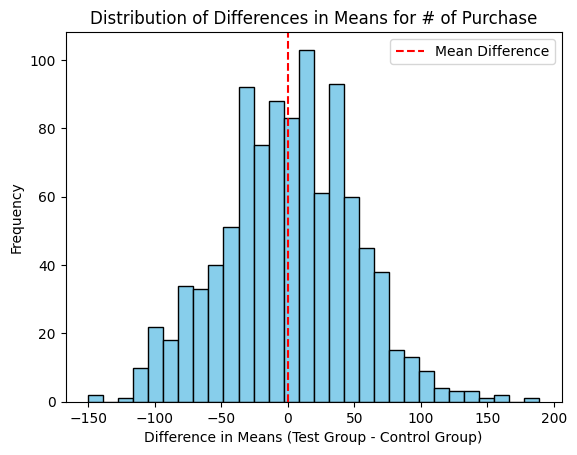

Boostrap:There is no significant difference between the test and control groups.
Mann:There is no significant difference between the test and control groups.


In [93]:
## NOW LETS TEST OUR FIRST KPI( NO OF PURCHASES) SINCE WE HAVE PROVED WE CANT USE T TEST HERE, LETS USE BOOSTRAPP,MANNWHITNEY TEST 
boostrap_sampling_test(df,'# of Purchase')
mannwhitney_test(df,'# of Purchase')
## both tests show that control and test campaighsn dont have any significant difference in terms of no of purchases

In [97]:
## now lets check for number of website clicks since it directly says about marketing effectiveness instead of profit(like purchases)
normality_test(df,'# of Website Clicks')
## the distribution is not normal
## lets do a/b test with boostrap and mannwhitney test


Shapiro-Wilk test results:
Control:
  Test Statistic: 0.9062
  p-value: 0.3731
  The null hypothesis of normality is not rejected, suggesting that the data is approximately normally distributed.

Test:
  Test Statistic: 0.9062
  p-value: 0.0120
  The null hypothesis of normality is rejected, suggesting that the data is not normally distributed.


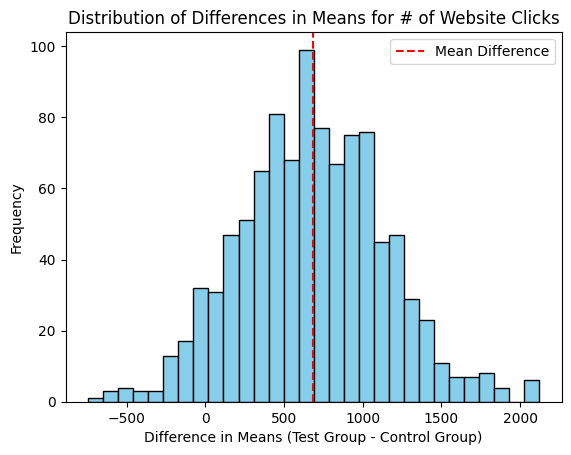

Boostrap:There is no significant difference between the test and control groups.
Mann:There is no significant difference between the test and control groups.


In [99]:
boostrap_sampling_test(df,'# of Website Clicks')
mannwhitney_test(df,'# of Website Clicks')
## there is again no difference in control and test in terms of website clicks

In [101]:
## now lets check for Reach
normality_test(df,'Reach')
## this is normal distribution, lets go for t test

Shapiro-Wilk test results:
Control:
  Test Statistic: 0.9324
  p-value: 0.6538
  The null hypothesis of normality is not rejected, suggesting that the data is approximately normally distributed.

Test:
  Test Statistic: 0.9324
  p-value: 0.0570
  The null hypothesis of normality is not rejected, suggesting that the data is approximately normally distributed.


In [107]:
t_test(df,'Reach')
## here control group performs better than test group in terms of reaches

The control group performs significantly better than the test group.


In [111]:
# lets do for searches
normality_test(df,'# of Searches')
# its not normal

Shapiro-Wilk test results:
Control:
  Test Statistic: 0.8964
  p-value: 0.0496
  The null hypothesis of normality is rejected, suggesting that the data is not normally distributed.

Test:
  Test Statistic: 0.8964
  p-value: 0.0068
  The null hypothesis of normality is rejected, suggesting that the data is not normally distributed.


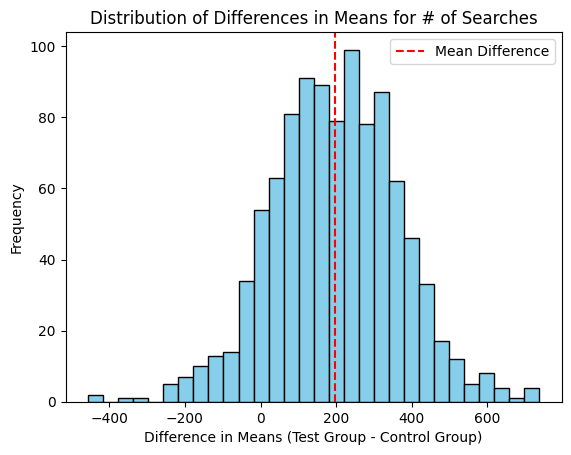

Boostrap:There is no significant difference between the test and control groups.
Mann:There is no significant difference between the test and control groups.


In [112]:
boostrap_sampling_test(df,'# of Searches')
mannwhitney_test(df,'# of Searches')
## There is no difference between control and test in no of searches as well